# Forecasting Faults in Electrical System Equipment to predict fault for manage the maintenance plan

## 1. Filter and Clean Import/Export CSV Data from GitHub
This script downloads a CSV file containing import/export trade data from a public GitHub repository.
It cleans the data by stripping whitespace, filters out rows where the trade flow is equal to "2",
and removes unnecessary columns. The cleaned and filtered data is then saved to a new CSV file
for further analysis or reporting.

In [ ]:
import pandas as pd

# This reads a CSV file from a GitHub URL.
input_file = 'https://raw.githubusercontent.com/Samuel-JULLY/KMUTNB_internship/refs/heads/main/DATA/import_export.csv'
df = pd.read_csv(input_file, sep=";", dtype=str)

# This removes leading and trailing spaces from all string values in the DataFrame.
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Keeps only the rows where the value in the tradeflow column is not equal to "2"
df_filtré = df[df["tradeflow"] != "2"]

# Removes the heading11 and ETL_DATE columns from the filtered DataFrame.
df_filtré = df_filtré.drop('heading11', axis=1)
df_filtré = df_filtré.drop('ETL_DATE', axis=1)

# Saves the filtered data to a new CSV file inside a folder named RSLT/.
output_file = 'RSLT/import_export_filtre.csv'
df_filtré.to_csv(output_file, index=False,encoding="utf-8-sig")

# Displays the path to the saved file (in French: "Filtered file saved as").
print(f"Filtered file saved as: {output_file}")

In [ ]:
import pandas as pd

# Charger le fichier .xlsx (feuille par défaut)
df = pd.read_excel('DATA/stat_export2566.xlsx')  # tu peux ajouter sheet_name='NomDeLaFeuille' si nécessaire

# Enregistrer en .csv
df.to_csv('DATA/stat_export2566.csv', index=False,encoding="utf-8-sig")  # index=False pour ne pas inclure la colonne d’index

# Charger le fichier .xlsx (feuille par défaut)
df = pd.read_excel('DATA/stat_export.xlsx')  # tu peux ajouter sheet_name='NomDeLaFeuille' si nécessaire

# Enregistrer en .csv
df.to_csv('DATA/stat_export.csv', index=False,encoding="utf-8-sig")  # index=False pour ne pas inclure la colonne d’index

# Charger le fichier .xlsx (feuille par défaut)
df = pd.read_excel('DATA/import_export.xlsx')  # tu peux ajouter sheet_name='NomDeLaFeuille' si nécessaire

# Enregistrer en .csv
df.to_csv('DATA/import_export.csv', index=False,encoding="utf-8-sig")  # index=False pour ne pas inclure la colonne d’index

In [4]:
import pandas as pd
# Charger le fichier .xlsx (feuille par défaut)
df = pd.read_excel('DATA/Export 2007-2024.xlsx')  # tu peux ajouter sheet_name='NomDeLaFeuille' si nécessaire

# Enregistrer en .csv
df.to_csv('DATA/Export 2007-2024.csv', index=False,encoding="utf-8-sig")  # index=False pour ne pas inclure la colonne d’index

In [ ]:
import pandas as pd
import os

# Liste de fichiers à fusionner
fichiers = ["DATA\import_export.csv","DATA\stat_export2566.csv", "DATA\stat_export.csv"]

# Colonnes qu'on veut garder
colonnes_utiles = ["month","year",  "countryNameTH","productDetailTH","productDetailEN", "weight", "price"]

# Liste pour stocker les DataFrames partiels
liste_dfs = []

for fichier in fichiers:
    if os.path.exists(fichier):
        # Lire le fichier
        df = pd.read_csv(fichier )
        
        # Sélectionner uniquement les colonnes utiles (si elles existent)
        colonnes_disponibles = [col for col in colonnes_utiles if col in df.columns]
        df_filtre = df[colonnes_disponibles]

        liste_dfs.append(df_filtre)
    else:
        print(f"Fichier introuvable : {fichier}")

# Fusionner tous les morceaux
df_final = pd.concat(liste_dfs, ignore_index=True)

# Sauvegarder dans un nouveau fichier
df_final.to_csv("fusion_partielle.csv", index=False, encoding="utf-8")

print("Fusion terminée. Fichier : fusion_partielle.csv")


Fusion terminée. Fichier : fusion_partielle.csv


In [21]:
import pandas as pd

# Lire le fichier CSV en sautant les lignes d'entête inutiles
df = pd.read_csv("C:/Users/noxra/OneDrive/Documents/Mobilite international Thailande/Projet/Webstat_Export_fr_5385698.csv", skiprows=6, sep=";", decimal=",", encoding="utf-8")

# Renommer proprement la colonne de date
df.rename(columns={df.columns[0]: "Date"}, inplace=True)

# Nettoyer les lignes invalides ou vides
df = df[df["Date"].notna()]
df = df[~df["Date"].str.lower().str.startswith(("samedi", "dimanche"))]

# Convertir la colonne 'Date' en datetime
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce")
df = df[df["Date"].notna()]  # Enlever les lignes où la conversion a échoué

# Convertir les autres colonnes en numérique
colonnes_numeriques = df.columns.drop("Date")
df[colonnes_numeriques] = df[colonnes_numeriques].apply(pd.to_numeric, errors="coerce")

# Définir la date comme index
df.set_index("Date", inplace=True)

# Grouper par mois : moyenne de chaque mois
df_mensuel = df.resample("M").mean()

# Enregistrer le résultat
df_mensuel.to_csv("cours_monnaies_par_mois.csv", encoding="utf-8", index=True)

print("✅ Fichier mensuel généré avec une ligne par mois.")


C:\Users\noxra\AppData\Local\Temp\ipykernel_6808\2571672502.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce")


✅ Fichier mensuel généré avec une ligne par mois.


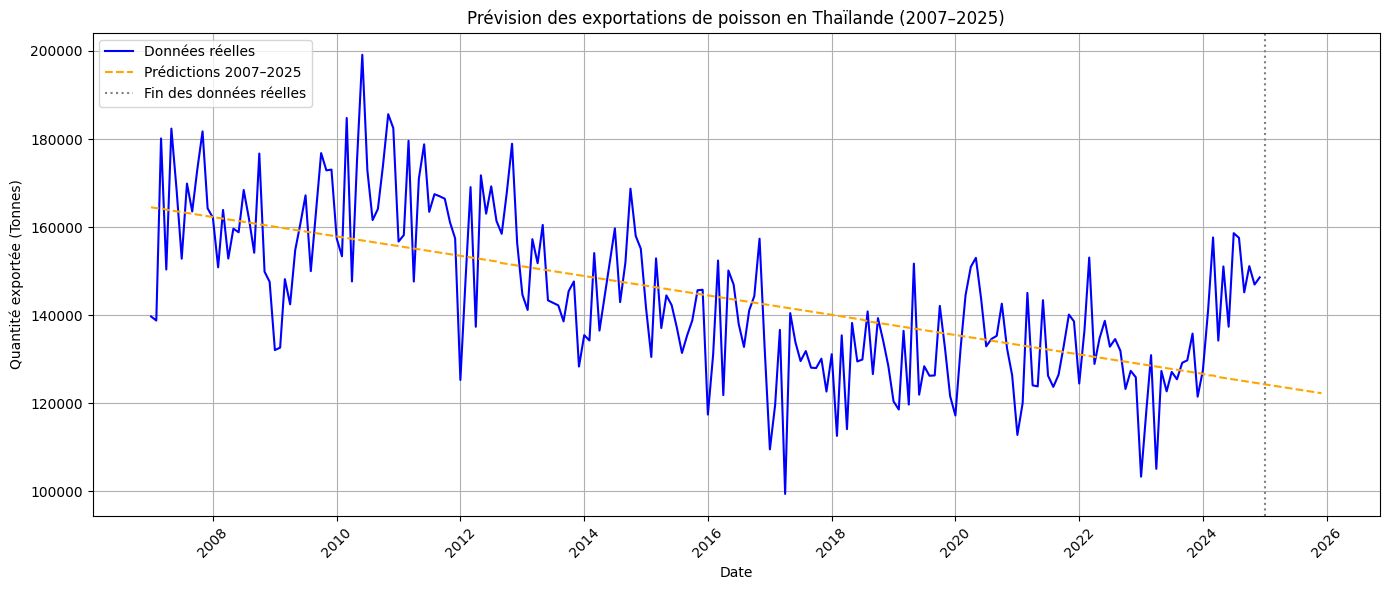

In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Charger les données
df = pd.read_csv("DATA/Export 2007-2024.csv")

# Créer une colonne datetime à partir de Year et Month
df['month'] = pd.to_datetime(df['Year (ค.ศ.)'].astype(str) + '-' + df['Month'].astype(str).str.zfill(2))

# Trier les données par date
df = df.sort_values('month')

# Créer une variable temporelle numérique
df['month_num'] = (df['month'] - df['month'].min()) // pd.Timedelta('30D')

# Entraînement sur toutes les données disponibles
X = df[['month_num']]
y = df['Grand Total Quantity (Tons)']
model = LinearRegression()
model.fit(X, y)

# Générer des dates de 2007 à fin 2025
all_months = pd.date_range(start=df['month'].min(), end="2025-12-01", freq='MS')
all_month_nums = ((all_months - df['month'].min()) // pd.Timedelta('30D')).astype(int)
X_all = pd.DataFrame({'month_num': all_month_nums})

# Prédictions sur toute la période
y_all_pred = model.predict(X_all)

# Affichage
plt.figure(figsize=(14, 6))
plt.plot(df['month'], y, label="Données réelles", color='blue')
plt.plot(all_months, y_all_pred, label="Prédictions 2007–2025", linestyle="--", color='orange')
plt.axvline(x=pd.to_datetime("2024-12-31"), color='grey', linestyle=':', label='Fin des données réelles')
plt.xlabel("Date")
plt.ylabel("Quantité exportée (Tonnes)")
plt.title("Prévision des exportations de poisson en Thaïlande (2007–2025)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 2. Classification Models

We are testing several machine learning models:

* Logistic Regression
* Perceptron
* SVM (Support Vector Machine)
* Decision Trees
* Random Forest
* K-Nearest Neighbors (KNN)
* Naïve Bayes

We will apply the same training method to the different models we are going to test and compare their performance.

### 2.1 Splitting the Dataset for Cross-Validation

We use 5-fold cross-validation with stratified sampling to evaluate model performance more reliably:
* The dataset is split into 5 distinct subsets of equal size.
* For each iteration, 80% of the data is used for training and the remaining 20% is used for testing, without overlap between test sets.
* This ensures that every data point is used exactly once for testing, allowing a more robust and generalized evaluation of the model.
* Stratified splitting ensures that each fold preserves the original class distribution, which is particularly important for imbalanced datasets.

In [14]:
# Cross-validation setup
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### 2.2 Training Classification Models

**1 - Model Training**

The model is created and trained on training data.

---

**2 - Prediction on the test set**

The model makes predictions on the test set to evaluate its performance.

--- 

**3 - Confusion Matrix**

Displays a table showing the number of ***correct and incorrect predictions***.

* Helps analyze ***classification errors***.
* Shows how many ***false positives and false negatives*** are produced.

---

**4 - Classification Report**

Displays the model evaluation metrics with `classification_report()`

* ***Precision***: Proportion of true positive predictions.
* ***Recall***: Ability to detect all positive classes.
* ***F1-score***: Harmonic mean between precision and recall.

---

**6 - AUC-ROC Score**

Calculates the area under the ROC curve, a global indicator of model quality.

* The closer the AUC is to ***1***, the better the model.
* An AUC of ***0.5*** means the model is ***predicting randomly***.

---

**7 - ROC curve**

Plots the ***ROC curve***, which shows the trade-off between the false positive rate and the true positive rate.

* Helps analyze the ***optimal classification threshold***.
* A curve close to the top-left corner indicates a ***good model***.

### 2.3 Applying the Models

1. Logistic Regression


--- Fold 1 ---
MSE: 134677577.47867537
R²: 0.46463599205901507

--- Fold 2 ---
MSE: 254820936.3855805
R²: 0.2805614420179082

--- Fold 3 ---
MSE: 262913255.33779755
R²: 0.3718104340472299

--- Fold 4 ---
MSE: 144748648.58058026
R²: 0.5550343696080403

--- Fold 5 ---
MSE: 172983617.2949184
R²: 0.36313485682168856


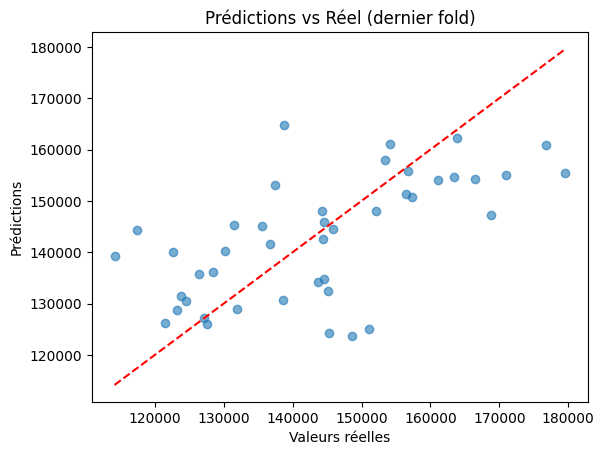

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

# Initialisation du modèle de régression
reg = LinearRegression()

# KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Stockage des scores
r2_scores = []
mse_scores = []

for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]
    
    # Entraînement
    reg.fit(X_train, y_train)
    
    # Prédiction
    y_pred = reg.predict(X_test)
    
    # Évaluation
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_scores.append(mse)
    r2_scores.append(r2)
    
    print(f"\n--- Fold {i+1} ---")
    print("MSE:", mse)
    print("R²:", r2)

plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Prédictions vs Réel (dernier fold)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()



2. Perceptron

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Model initialization
perceptron = Perceptron(random_state=42)

# Storage for averages
roc_aucs = []
mean_fpr = np.linspace(0, 1, 100)
tprs = []

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Training
    perceptron.fit(X_train, y_train)
    
    # Prediction
    y_pred = perceptron.predict(X_test)
    
    # Since Perceptron does not support predict_proba, we use predicted labels for AUC
    y_score = y_pred  # Not ideal, but allows auc_score to compute something
    
    # Display results
    print(f"\n--- Fold {i+1} ---")
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification report:\n", classification_report(y_test, y_pred))
    try:
        roc_auc = roc_auc_score(y_test, y_score)
        print("AUC-ROC:", roc_auc)
        roc_aucs.append(roc_auc)

        # ROC curve (approximate, since no probabilities)
        fpr, tpr, _ = roc_curve(y_test, y_score)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        plt.plot(fpr, tpr, label=f'Fold {i+1} (AUC = {roc_auc:.2f})')
    except ValueError:
        print("AUC-ROC: Cannot be computed (only one class predicted)")

# Display mean ROC curve
if tprs:
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = np.mean(roc_aucs)
    plt.plot(mean_fpr, mean_tpr, color='black', linestyle='--',
             label=f'Mean (AUC = {mean_auc:.2f})')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves - 5-Fold Cross-Validation (Perceptron)")
    plt.legend()
    plt.show()
else:
    print("\nROC curves were not plotted due to lack of valid AUC scores.")

3. SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Model initialization (important: probability=True to enable predict_proba)
svm_model = SVC(kernel='linear', probability=True, random_state=42)

# Storage for averages
roc_aucs = []
mean_fpr = np.linspace(0, 1, 100)
tprs = []

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Training
    svm_model.fit(X_train, y_train)
    
    # Prediction
    y_pred = svm_model.predict(X_test)
    y_score = svm_model.predict_proba(X_test)[:, 1]
    
    # Display results
    print(f"\n--- Fold {i+1} ---")
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification report:\n", classification_report(y_test, y_pred))
    roc_auc = roc_auc_score(y_test, y_score)
    print("AUC-ROC:", roc_auc)
    roc_aucs.append(roc_auc)

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_score)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    plt.plot(fpr, tpr, label=f'Fold {i+1} (AUC = {roc_auc:.2f})')

# Display mean ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_auc = np.mean(roc_aucs)
plt.plot(mean_fpr, mean_tpr, color='black', linestyle='--',
         label=f'Mean (AUC = {mean_auc:.2f})')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - 5-Fold Cross-Validation (SVM)")
plt.legend()
plt.show()

4. Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Model initialization
dtree = DecisionTreeClassifier(random_state=42)

# Storage for averages
roc_aucs = []
mean_fpr = np.linspace(0, 1, 100)
tprs = []

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Training
    dtree.fit(X_train, y_train)
    
    # Prediction
    y_pred = dtree.predict(X_test)
    y_score = dtree.predict_proba(X_test)[:, 1]
    
    # Display results
    print(f"\n--- Fold {i+1} ---")
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification report:\n", classification_report(y_test, y_pred))
    roc_auc = roc_auc_score(y_test, y_score)
    print("AUC-ROC:", roc_auc)
    roc_aucs.append(roc_auc)
    
    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_score)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    plt.plot(fpr, tpr, label=f'Fold {i+1} (AUC = {roc_auc:.2f})')

# Display mean ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_auc = np.mean(roc_aucs)
plt.plot(mean_fpr, mean_tpr, color='black', linestyle='--',
         label=f'Mean (AUC = {mean_auc:.2f})')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - 5-Fold Cross-Validation (Decision Tree)")
plt.legend()
plt.show()

5. Random Forest


--- Fold 1 ---
MSE : 73329711.2106001
R²  : 0.7085031611807994

--- Fold 2 ---
MSE : 184288321.34425896
R²  : 0.47969689601864074

--- Fold 3 ---
MSE : 252504342.07514608
R²  : 0.3966808830327856

--- Fold 4 ---
MSE : 192057748.32650787
R²  : 0.40960348926373147

--- Fold 5 ---
MSE : 173171705.29533523
R²  : 0.36244238262564155

--- Moyennes sur les 5 folds ---
MSE moyen : 175070365.65036964
R² moyen  : 0.4713853624243197


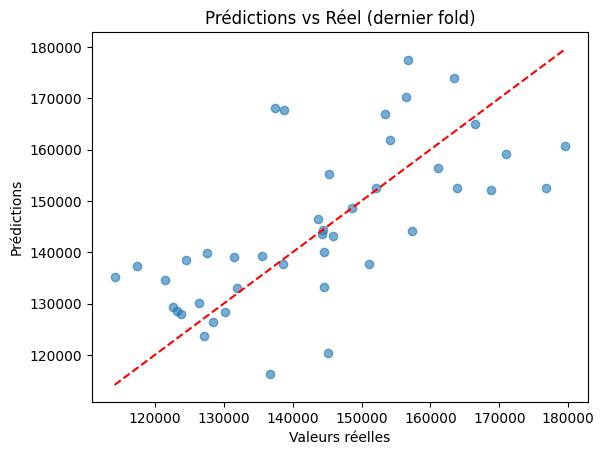

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Création de la colonne date
data['date'] = pd.to_datetime(dict(year=data['année'], month=data['mois'], day=1))

# Séparation X et y
X = data.drop(columns=['quantité_export'])  # ou le nom réel de ta cible
y = data['quantité_export']  # la variable cible

# Initialisation du modèle
rf = RandomForestRegressor(n_estimators=100, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_scores = []
r2_scores = []

# Pour stocker les valeurs du dernier fold
last_y_test = None
last_y_pred = None
last_dates = None

for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]
    
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_scores.append(mse)
    r2_scores.append(r2)
    
    print(f"\n--- Fold {i+1} ---")
    print("MSE :", mse)
    print("R²  :", r2)

    # Sauvegarde pour la courbe du dernier fold
    if i == kf.get_n_splits() - 1:
        last_y_test = y_test.copy()
        last_y_pred = pd.Series(y_pred, index=y_test.index)
        last_dates = data.iloc[test_index]['date']

# Moyennes des scores
print("\n--- Moyennes sur les 5 folds ---")
print("MSE moyen :", np.mean(mse_scores))
print("R² moyen  :", np.mean(r2_scores))

# Graphique temporel sur le dernier fold
sorted_idx = last_dates.argsort()
dates_sorted = last_dates.iloc[sorted_idx]
y_test_sorted = last_y_test.iloc[sorted_idx]
y_pred_sorted = last_y_pred.iloc[sorted_idx]

plt.figure(figsize=(12, 6))
plt.plot(dates_sorted, y_test_sorted, label="Valeurs réelles", linewidth=2)
plt.plot(dates_sorted, y_pred_sorted, label="Prédictions", linewidth=2)
plt.xlabel("Date")
plt.ylabel("Quantité d'exportation")
plt.title("Évolution temporelle des prédictions vs réel (dernier fold)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


6. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Model initialization
knn = KNeighborsClassifier(n_neighbors=5)

# Storage for averages
roc_aucs = []
mean_fpr = np.linspace(0, 1, 100)
tprs = []

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Training
    knn.fit(X_train, y_train)
    
    # Prediction
    y_pred = knn.predict(X_test)
    y_score = knn.predict_proba(X_test)[:, 1]
    
    # Display results
    print(f"\n--- Fold {i+1} ---")
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification report:\n", classification_report(y_test, y_pred))
    roc_auc = roc_auc_score(y_test, y_score)
    print("AUC-ROC:", roc_auc)
    roc_aucs.append(roc_auc)
    
    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_score)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    plt.plot(fpr, tpr, label=f'Fold {i+1} (AUC = {roc_auc:.2f})')

# Display mean ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_auc = np.mean(roc_aucs)
plt.plot(mean_fpr, mean_tpr, color='black', linestyle='--',
         label=f'Mean (AUC = {mean_auc:.2f})')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - 5-Fold Cross-Validation (KNN)")
plt.legend()
plt.show()

7. Naïve Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Model initialization
nb = GaussianNB()

# Storage for averages
roc_aucs = []
mean_fpr = np.linspace(0, 1, 100)
tprs = []

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Training
    nb.fit(X_train, y_train)
    
    # Prediction
    y_pred = nb.predict(X_test)
    y_score = nb.predict_proba(X_test)[:, 1]
    
    # Display results
    print(f"\n--- Fold {i+1} ---")
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification report:\n", classification_report(y_test, y_pred))
    roc_auc = roc_auc_score(y_test, y_score)
    print("AUC-ROC:", roc_auc)
    roc_aucs.append(roc_auc)
    
    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_score)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    plt.plot(fpr, tpr, label=f'Fold {i+1} (AUC = {roc_auc:.2f})')

# Display mean ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_auc = np.mean(roc_aucs)
plt.plot(mean_fpr, mean_tpr, color='black', linestyle='--',
         label=f'Mean (AUC = {mean_auc:.2f})')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - 5-Fold Cross-Validation (Naive Bayes)")
plt.legend()
plt.show()